## Step 1: State the Null and Alternative Hypothesis

#### Null Hypothesis:  Discount amounts Does not have a statistically significant effect on the quantity of a product in an order.
                                               
                                               

- $H_0$: u1 - u2 = 0

#### Alternate Hypothesis:    Discount amounts Does  have a statistically significant effect on the quantity of a product in an order
                          

                                               

- $H_\alpha$ = u1 - u2 != 0

## Step 2:  Choose a Significance Level(Alpha)

                                                

- $\alpha$: 0.05

## Step 3: Identify the Test Statistic & Probability Distribuition

- Our sample size is large (n>30) the appropriate test statistic to find our 'P_value" is WELCH'S T-TEST

                         
                        
                         
                                  
                                               

In [1]:
#Calculate degrees of freedom
Sample1 = 77
Sample2 = 77
Degreesoffreedom = 77+77-2
Degreesoffreedom



152

In [2]:
from scipy import stats
import numpy as np
import seaborn as sns
import itertools

## Step 5: Collect  Data From Northwind Database

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [4]:
#Set the connection with our database
#Explore and visualize the data

In [5]:
connection = sqlite3.connect('Northwind_small.sqlite') 
cur = connection.cursor()


In [6]:
cur.execute("""SELECT *
                FROM Product
                Order By Id ASC""")
Products_df = pd.DataFrame(cur.fetchall())
Products_df.columns = [x[0] for x in cur.description]
Products_df.head()


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [7]:
Products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
Id                 77 non-null int64
ProductName        77 non-null object
SupplierId         77 non-null int64
CategoryId         77 non-null int64
QuantityPerUnit    77 non-null object
UnitPrice          77 non-null float64
UnitsInStock       77 non-null int64
UnitsOnOrder       77 non-null int64
ReorderLevel       77 non-null int64
Discontinued       77 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


In [8]:
cur.execute("""SELECT *
               FROM Orderdetail
               order by Id Asc
            """)
details_df = pd.DataFrame(cur.fetchall())
details_df.columns = [x[0] for x in cur.description]
details_df.head()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


### 5.1: Separate Data from both tables 


In [9]:
cur.execute("""SELECT Id,ProductName,UnitPrice
               FROM Product
               
               """)

Product_details = pd.DataFrame(cur.fetchall())
Product_details.columns = [x[0] for x in cur.description]
Product_details.head()

,Id,ProductName,UnitPrice
0,1,Chai,18.00
1,2,Chang,19.00
2,3,Aniseed Syrup,10.00
3,4,Chef Anton's Cajun Seasoning,22.00
4,5,Chef Anton's Gumbo Mix,21.35


In [10]:
cur.execute("""SELECT ProductId as Id, Quantity,discount
               FROM Orderdetail
               
               
               
            """)
Order_Product_details = pd.DataFrame(cur.fetchall())
Order_Product_details.columns = [x[0] for x in cur.description]
Order_Product_details.head()

,Id,Quantity,Discount
0,11,12,0.0
1,42,10,0.0
2,72,5,0.0
3,14,9,0.0
4,51,40,0.0


### 5.2:  Merge data from both tables to make one Dataframe

In [34]:
detailed_order = pd.merge(Product_details,Order_Product_details,on='Id')
detailed_order.head()

,Id,ProductName,UnitPrice,Quantity,Discount
0,1,Chai,18.0,45,0.20
1,1,Chai,18.0,18,0.00
2,1,Chai,18.0,20,0.00
3,1,Chai,18.0,15,0.15
4,1,Chai,18.0,12,0.00


In [35]:
detailed_order.shape

(2155, 5)

### 5.3: Separate Data into two diffrent groups (Discount Offered) & (No Discount Offered)

#### order details when a discount was offered

In [12]:
Detailed_order_with_disc = detailed_order.loc[detailed_order['Discount']> 0]
Detailed_order_with_disc.head()

,Id,ProductName,UnitPrice,Quantity,Discount
0,1,Chai,18.0,45,0.20
3,1,Chai,18.0,15,0.15
5,1,Chai,18.0,15,0.15
9,1,Chai,18.0,40,0.20
10,1,Chai,18.0,8,0.15


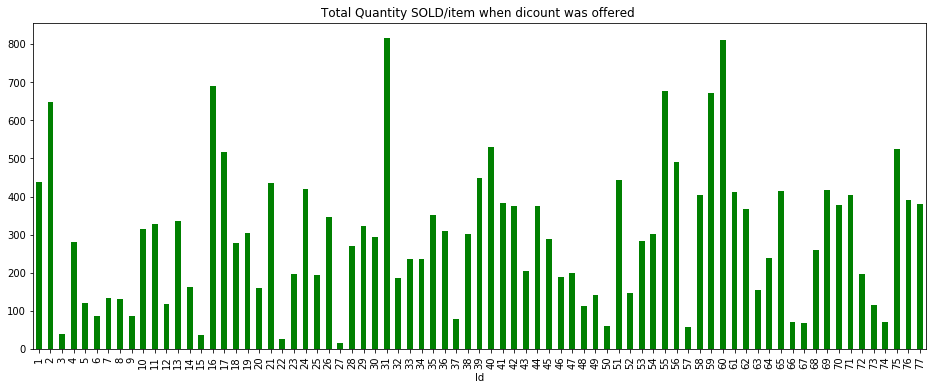

In [13]:
Detailed_order_with_disc.groupby('Id')['Quantity'].sum().plot(kind='bar',figsize=(16,6),color='green',
                                                             title='Total Quantity SOLD/item when dicount was offered ')

#### order details when "No" discount was offered

In [14]:
Detailed_order_no_disc = detailed_order.loc[detailed_order['Discount']== 0.00]
Detailed_order_no_disc.head()

,Id,ProductName,UnitPrice,Quantity,Discount
1,1,Chai,18.0,18,0.0
2,1,Chai,18.0,20,0.0
4,1,Chai,18.0,12,0.0
6,1,Chai,18.0,10,0.0
7,1,Chai,18.0,24,0.0


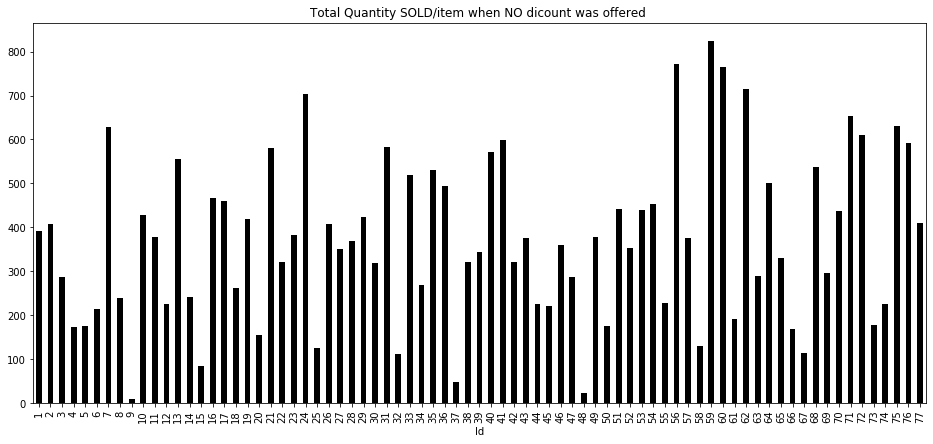

In [15]:
Detailed_order_no_disc.groupby('Id')['Quantity'].sum().plot(kind='bar',figsize=(16,7),color='black',
                                                            title='Total Quantity SOLD/item when NO dicount was offered ')

### Calculate the mean and variance of Sample_1 when no discount was offered

In [16]:
#Mean  order quantity  per item without discount

group1 = Detailed_order_no_disc.groupby('Id')['Quantity'].mean()
group1.head()

Id
1    17.772727
2    21.473684
3    28.800000
4    17.200000
5    29.333333
Name: Quantity, dtype: float64

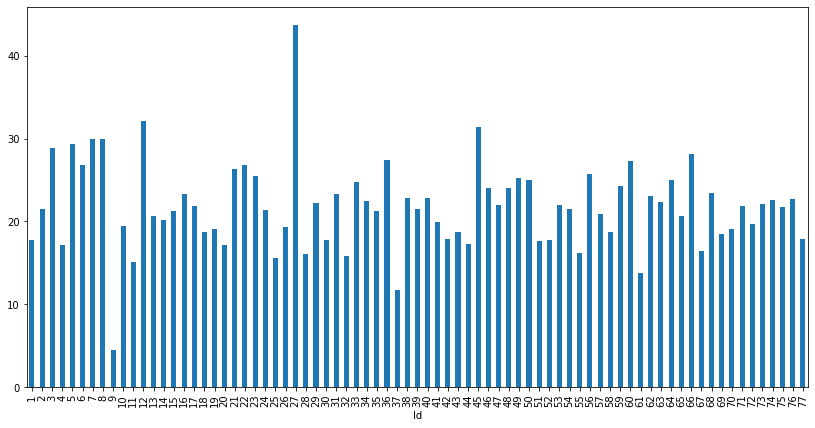

In [17]:
group1.plot(kind='bar',figsize=(14,7))

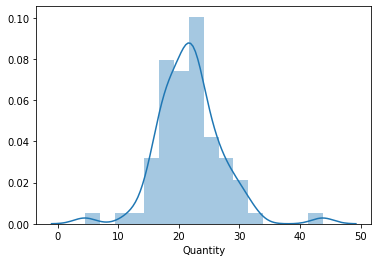

In [18]:
#Visualize the distibution of means

sns.distplot(group1)

In [19]:
# Calculate the mean of sample_1

sample1_mean = group1.mean()
print(sample1_mean)

#Calculate the variance

sample1_var = group1.var()
print(sample1_var)

group1.std()

21.81167852821319
27.780895965961438


5.2707585759510405

### Calculate mean and variance for Sample_2 when discount was offered

In [20]:
#Mean  order quantity  per item with discount

group2 = Detailed_order_with_disc.groupby('Id')['Quantity'].mean()
group2.head()

Id
1    27.3125
2    25.9600
3    20.0000
4    28.1000
5    30.5000
Name: Quantity, dtype: float64

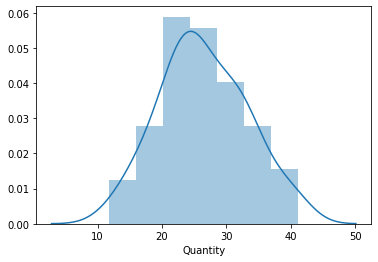

In [21]:
#Visualize the distibution of means

sns.distplot(group2)


In [22]:
#  Calculate mean of sample_2

sample_mean2 =group2.mean()
print(sample_mean2)

sample_var2 = group2.var()
print(sample_var2)

group2.std()

26.43253285866255
45.06735489534375


6.71322239281135

## Visualization of Order Quanties

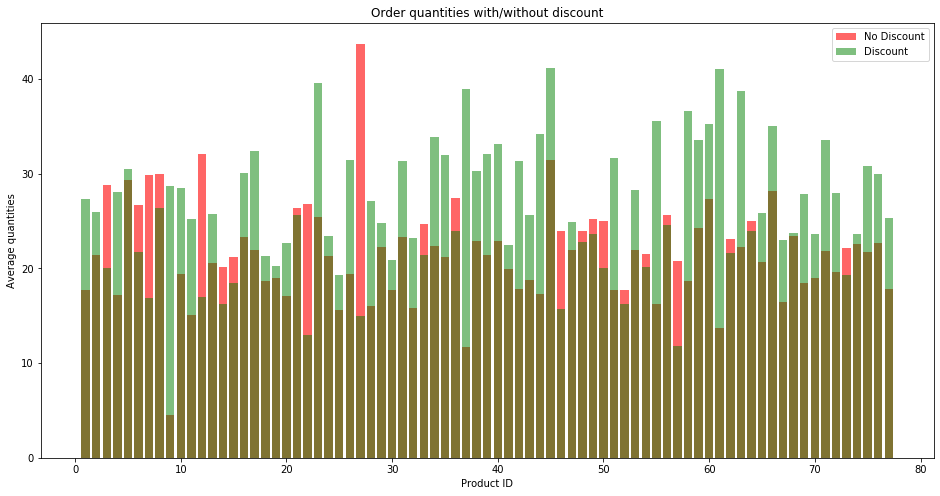

On average 70.0% of discounted products were sold in larger quantities


In [23]:
plt.figure(figsize=(16,8))
plt.bar(group1.index, group1.values, alpha=0.6, label='No Discount',color='red')
plt.bar(group2.index, group2.values, alpha=0.5, label='Discount',color='green')
plt.legend()
plt.title('Order quantities with/without discount')
plt.xlabel('Product ID')
plt.ylabel('Average quantities')
plt.show()


print("On average {}% of discounted products were sold in larger quantities".format(round(sum(group2.values > group1.values)/len(group2.values)*100),2))

In [24]:
Discount_levels = detailed_order['Discount'].unique()
list(Discount_levels)

[0.2, 0.0, 0.15, 0.25, 0.05, 0.1, 0.02, 0.03, 0.04, 0.06, 0.01]

In [25]:
#Separate Data into Groups of different discount level
groups = {}
for i in Discount_levels:
    groups[i] = detailed_order[detailed_order['Discount']==i]

Discounts_df = pd.DataFrame()
for i in groups.keys():
    Discounts_df = Discounts_df.append({'Discount% ':i*100,'Avg. Order Quantity':groups[i]['Quantity'].mean()}, ignore_index=True)

Discounts_df

,Avg. Order Quantity,Discount%
0,27.024845,20.0
1,21.715262,0.0
2,28.382166,15.0
3,28.240260,25.0
4,28.010811,5.0
5,25.236994,10.0
6,2.000000,2.0
7,1.666667,3.0
8,1.000000,4.0
9,2.000000,6.0


In [26]:
discounts_significance_df = pd.DataFrame(columns=['Discount %','Null Hypothesis','P-Value'], index=None)

discounts = [0.05, 0.1, 0.15, 0.2, 0.25]
control = detailed_order[detailed_order['Discount']==0]['Quantity']
for i in discounts:
    experimental = detailed_order[detailed_order['Discount']==i]['Quantity']
    st, p = stats.ttest_ind(control, experimental)
    
    discounts_significance_df = discounts_significance_df.append( { 'Discount %' : str(i*100)+'%' , 'Null Hypothesis' : 'Reject' if p < 0.025 else 'Failed', 'P-Value' : p } , ignore_index=True)    

discounts_significance_df

,Discount %,Null Hypothesis,P-Value
0,5.0%,Reject,0.000011
1,10.0%,Reject,0.015501
2,15.0%,Reject,0.000011
3,20.0%,Reject,0.000326
4,25.0%,Reject,0.000018


### Result of the test shows that there is _**statistically significant**_ difference in quantities between orders with no discount and with applied discounts of 5% or higher.

In [27]:
#Calculate the test statisics and p-value for individual discount amount


discounts = np.array([0.05, 0.1, 0.15, 0.2, 0.25])
combination = itertools.combinations(discounts, 2)
discount_levels_df = pd.DataFrame(columns=['Discount %','Null Hypothesis','P-Value'], index=None)

for i in combination:
    
    control =      detailed_order[detailed_order['Discount']==i[0]]['Quantity']
    experimental = detailed_order[detailed_order['Discount']==i[1]]['Quantity']
    
    st, p = stats.ttest_ind(experimental, control)
    
    discount_levels_df = discount_levels_df.append( { 'Discount %' : str(i[0]*100)+'% - '+str(i[1]*100)+'%', 'Null Hypothesis' : 'Reject' if p < 0.05 else 'Failed', 'P-Value' : p } , ignore_index=True)    

discount_levels_df

,Discount %,Null Hypothesis,P-Value
0,5.0% - 10.0%,Failed,0.227824
1,5.0% - 15.0%,Failed,0.874302
2,5.0% - 20.0%,Failed,0.658742
3,5.0% - 25.0%,Failed,0.921297
4,10.0% - 15.0%,Failed,0.176421
5,10.0% - 20.0%,Failed,0.416912
6,10.0% - 25.0%,Failed,0.191081
7,15.0% - 20.0%,Failed,0.543396
8,15.0% - 25.0%,Failed,0.951441
9,20.0% - 25.0%,Failed,0.580147


#### Calculate pooled variance 

In [28]:
s_p = (Sample2* sample_var2 + Sample1 *sample1_var)/(Sample1+Sample2)
s_p

36.42412543065259

###  calculate the T-Statistics separately

In [29]:
Observation_1 = Detailed_order_with_disc['Quantity']

Observation_2 = Detailed_order_no_disc['Quantity']

In [36]:
stats.ttest_ind(Observation_1,Observation_2,equal_var=False)

Ttest_indResult(statistic=6.239069142123972, pvalue=5.656414290304329e-10)

In [37]:
np.exp(5.656414290304329e-10)

1.0000000005656415

In [31]:
from statsmodels.stats.power import TTestIndPower

In [32]:
power_analysis = TTestIndPower()

In [33]:
power_analysis.solve_power(nobs1=77, effect_size=None,power=0.86,alpha=0.05)

0.4931104129763784

## Step 6:  Make Statistical Decision

####  Our Hypothesis Test Proposed that "   Discount amounts of 5% and above Do  have a statistically significant effect on the quantity of a product in an order.
                                               
                             
 



   ### Hence, We Reject our Null Hypothesis.
                                                    